In [1]:
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import load_2D_dataset
from utils.l_layer_application_utils import *

In [2]:
def model(x,y,learning_rate = 0.02, iterations = 40000, initialization = "he", print_cost = True, l2_reg = True, lambdaa= 10e-4, keep_prob = 0.9):
    grads = {}
    costs = []
    m = x.shape[1]
    layer_dims = [x.shape[0], 20,3,1]
    if initialization == "random":
        parameters = initialize_parameters_type(layer_dims , "random")
    elif initialization == "zeros":
        parameters = initialize_parameters_type(layer_dims , "zeros")
    else:
        parameters = initialize_parameters_type(layer_dims ,"he")
    for i in range(iterations):
        AL, cache = forward(x,parameters, keep_prob)
        grads = L_model_backward(AL,y, cache, l2_reg = l2_reg, lambd_ = lambdaa, keep_prob = keep_prob)
        parameters = update_params(parameters, grads, learning_rate)
        if print_cost and i % 1000 == 0:
            cost = compute_cost(AL,y, l2_reg = l2_reg, lambd_ = lambdaa, params = parameters,)
            print(f"Cost after iteration {i}: {cost}")
            costs.append(cost)
        
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

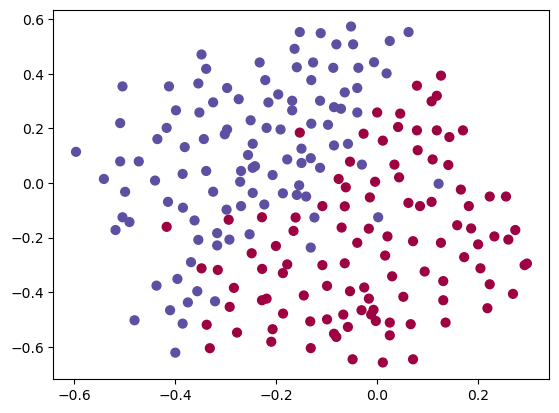

In [3]:
train_x, train_y, test_x, test_y = load_2D_dataset()

Cost after iteration 0: 0.7721147966090901
Cost after iteration 1000: 0.20913784759047452
Cost after iteration 2000: 0.20148983574712626
Cost after iteration 3000: 0.19951449767347848
Cost after iteration 4000: 0.19734194389679266
Cost after iteration 5000: 0.2004430389583159
Cost after iteration 6000: 0.1621649772581038
Cost after iteration 7000: 0.14913168175204944
Cost after iteration 8000: 0.1483981569526952
Cost after iteration 9000: 0.15276457067773275


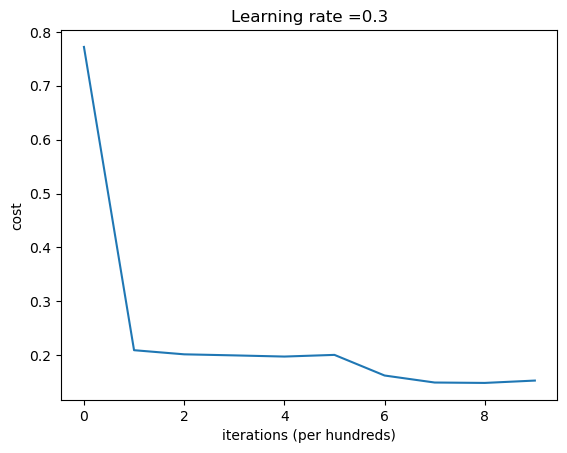

In [18]:
params = model(train_x, train_y,learning_rate = 0.3,iterations = 10000, keep_prob = 1, l2_reg = False,)

In [19]:
y_hat = predict(test_x,params)
accuracy = (1- np.mean(np.abs(y_hat - test_y))) * 100

In [20]:
accuracy

92.0